In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import word_tokenize
import re
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

# Download the 'punkt' tokenizer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
data = pd.read_csv('/kaggle/input/datasetumong/Bengali_Banglish_80K_Dataset.csv')
data.rename(columns={"Bengali": "text"}, inplace=True)
data.drop(columns=["Banglish"], inplace=True)
data

,text,Label
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear
...,...,...
80093,কী ম্যাচিউর একটা কাজ! আশফাক নিপুনরা আছে বলেই এ...,disgust
80094,সত্যটা কি সেটা আসলে জান্তে পারলাম না । আর পুরা...,surprise
80095,এভাবেই পুরুষেরা পার পেয়ে যায়।কিন্তু তাদের চোখে...,surprise
80096,যদিও আফরান নিশু বস আছে বসের নাটক বাদ দেয় না তা...,disgust


In [3]:

print("Total Texts:",len(data),
      "\nTotal Fear Texts:",len(data[data.Label =='fear']),
      "\nTotal Surprise  Texts :",len(data[data.Label=='surprise']),
      "\nTotal Disgust Texts  :",len(data[data.Label =='disgust']),
      "\nTotal Joy Texts:",len(data[data.Label =='joy']),
      "\nTotal Anger Texts:",len(data[data.Label=='anger']),
      "\nTotal Sadness Texts:",len(data[data.Label == 'sadness']))

Total Texts: 80098 
Total Fear Texts: 7565 
Total Surprise  Texts : 10107 
Total Disgust Texts  : 13099 
Total Joy Texts: 17837 
Total Anger Texts: 15180 
Total Sadness Texts: 16310


In [4]:
data1 = pd.read_excel('/kaggle/input/datasetumong/UBMEC Corpus_Sakib(updated).xlsx')
data1.rename(columns={"classes": "Label"}, inplace=True)

data1

,text,Label
0,এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...,joy
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...,surprise
2,"বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক ""কোথাও কেউ...",joy
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...",joy
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...,surprise
...,...,...
13431,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,joy
13432,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,joy
13433,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,joy
13434,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,joy


In [5]:

print("Total Texts:",len(data1),
      "\nTotal Fear Texts:",len(data1[data1.Label =='fear']),
      "\nTotal Surprise  Texts :",len(data1[data1.Label=='surprise']),
      "\nTotal Disgust Texts  :",len(data1[data1.Label =='disgust']),
      "\nTotal Joy Texts:",len(data1[data1.Label =='joy']),
      "\nTotal Anger Texts:",len(data1[data1.Label=='anger']),
      "\nTotal Sadness Texts:",len(data1[data1.Label == 'sadness']))

Total Texts: 13436 
Total Fear Texts: 1361 
Total Surprise  Texts : 1366 
Total Disgust Texts  : 2079 
Total Joy Texts: 3467 
Total Anger Texts: 2480 
Total Sadness Texts: 2683


In [6]:
data = pd.concat([data, data1], ignore_index=True)

In [7]:
data.rename(columns={"Label": "label"}, inplace=True)

In [8]:

print("Total Texts:",len(data),
      "\nTotal Fear Texts:",len(data[data.label =='fear']),
      "\nTotal Surprise  Texts :",len(data[data.label=='surprise']),
      "\nTotal Disgust Texts  :",len(data[data.label =='disgust']),
      "\nTotal Joy Texts:",len(data[data.label =='joy']),
      "\nTotal Anger Texts:",len(data[data.label=='anger']),
      "\nTotal Sadness Texts:",len(data[data.label == 'sadness']))

Total Texts: 93534 
Total Fear Texts: 8926 
Total Surprise  Texts : 11473 
Total Disgust Texts  : 15178 
Total Joy Texts: 21304 
Total Anger Texts: 17660 
Total Sadness Texts: 18993


In [9]:
data['text'][12]

' তার কয়েকদিন পরেই বাড়িটা উত্তর দিকে সামান্য হেলে যায় এখনো মাঝে মাঝে সেই ঘটনা মনে হলে গায়ে কাটা দিয়ে উঠে '

In [10]:
import pandas as pd

# Assuming df is already loaded
df = data  # Ensure 'data' is a valid DataFrame

# Function to count sentences in a text safely
def count_sentences(text):
    if isinstance(text, str):  # Check if the value is a string
        return len([s for s in text.split('।') if s.strip()])  # Splitting by Bengali danda (।)
    else:
        return 0  # Return 0 if the value is not a valid string

# Apply function to count sentences
df["sentence_count"] = df["text"].astype(str).apply(count_sentences)

# Compute statistics
max_sentences = df["sentence_count"].max()
min_sentences = df["sentence_count"].min()
avg_sentences = df["sentence_count"].mean()
total_sentences = df["sentence_count"].sum()

# Print statistics
print(f"Total sentences in the DataFrame: {total_sentences}")
print(f"Max sentences: {max_sentences}")
print(f"Min sentences: {min_sentences}")
print(f"Avg sentences: {avg_sentences:.2f}")


Total sentences in the DataFrame: 139709
Max sentences: 70
Min sentences: 1
Avg sentences: 1.49


In [11]:
# print some unprocessed reviews

print("Some Unprocessed Reviews")
print("\n")

sample_data = [ 112, 347,  283]
for i in sample_data:
      print(data.text[i],'\n','Language:-- ',data.label[i],'\n')

Some Unprocessed Reviews


আমি সিঙ্গেল রুমে থাকতাম  কিছুটা ভয় পেয়ে পাশের রুমের বড় ভাইকে ডেকে তুললাম  
 Language:--  fear 

 দিনের বেলা একা থাকা ভয় না করলেও রাতের বেলা  ভয় করত আর প্রথম চার দিন প্রাকৃতিক ডাকেও সাড়া দেয় নি ভূতের ভয়ে 
 Language:--  fear 

হক ভাই কথা বলতে পারেন না ভয়ে থরথর করে কাঁপছেন অনেক কষ্ট করে বললেন আ আ আমার ঘরে…আপনার ঘরে কীআমার ঘরে একটা মানুষঘরের ছাদের সমান লম্বা 
 Language:--  fear 



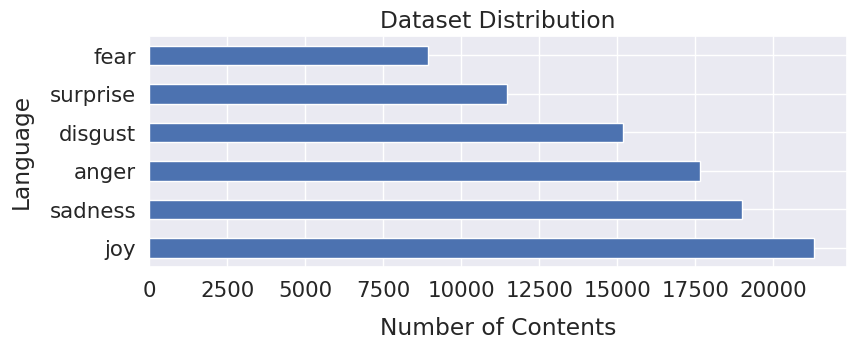

In [12]:
data['category'] = data['label']
data['content'] = data['text']
sns.set(font_scale=1.4)
data['category'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Contents", labelpad=12)
plt.ylabel("Language", labelpad=12)
plt.yticks(rotation = 0)
plt.title("Dataset Distribution", y=1);

In [13]:
import pandas as pd


# Assume 'class_label' is the column containing class labels
class_labels = data['category']

# Calculate class distribution
class_distribution = class_labels.value_counts()
print(class_distribution)


category
joy         21304
sadness     18993
anger       17660
disgust     15178
surprise    11473
fear         8926
Name: count, dtype: int64


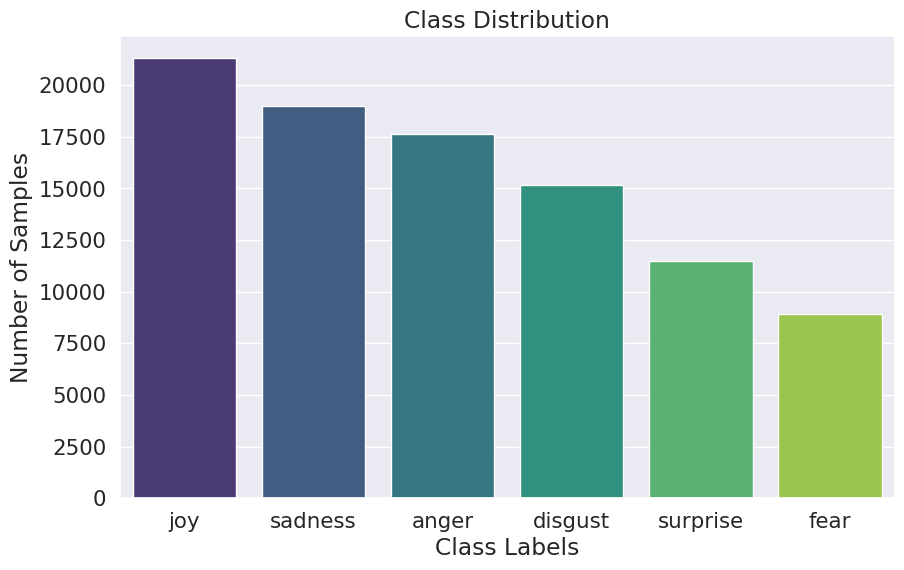

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


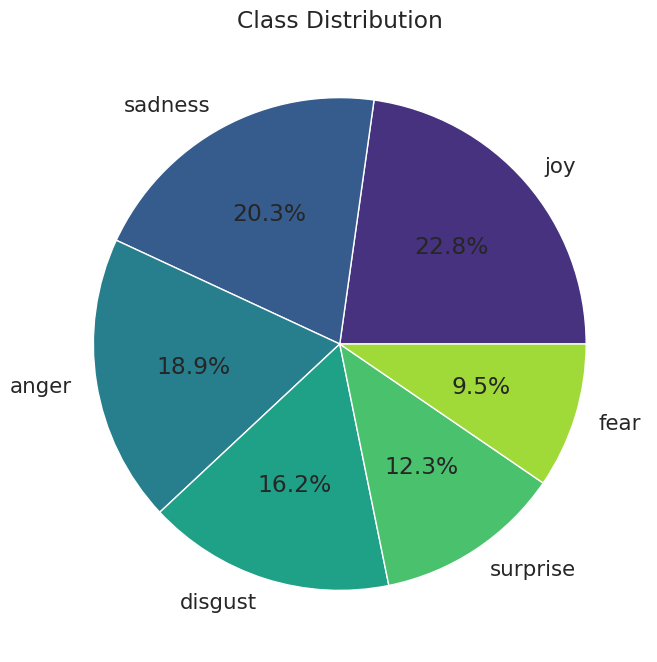

In [15]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    class_distribution, 
    labels=class_distribution.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette('viridis', len(class_distribution))
)
plt.title('Class Distribution')

# Save the figure as a PDF
plt.savefig("class_distribution.pdf", format="pdf", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

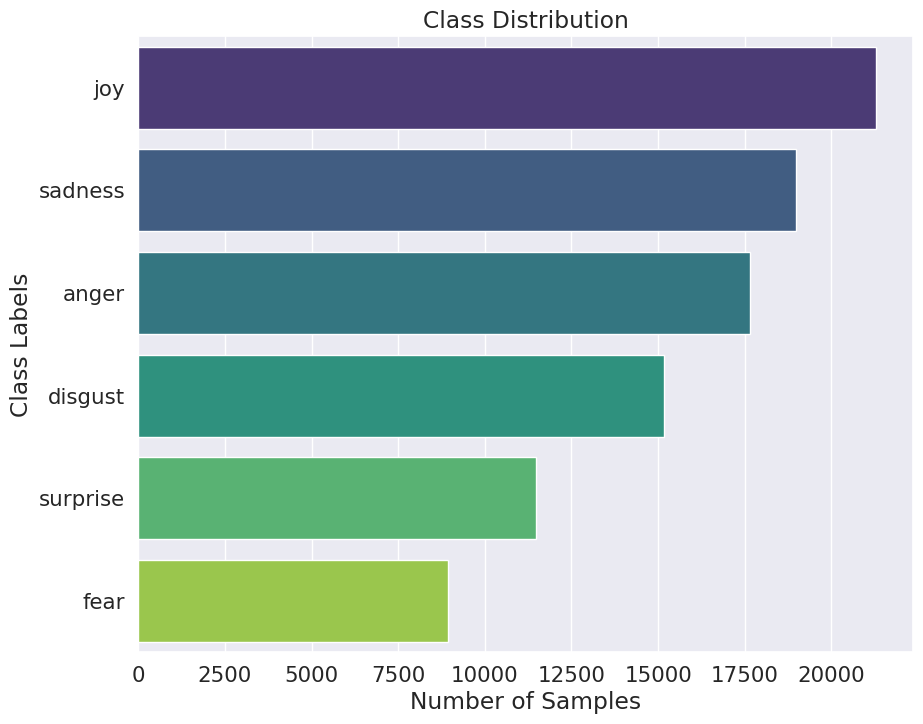

In [16]:

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(y=class_distribution.index, x=class_distribution.values, palette='viridis')
plt.ylabel('Class Labels')
plt.xlabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


## **Data Cleaning**

In [17]:
# import re

# # Data cleaning function
# def process_content(content):
#     content = re.sub('[^\w\s\u0980-\u09FF\u09E6-\u09EF]', ' ', str(content))  # Removing unnecessary punctuation
#     content = content.strip()  # Removing leading/trailing spaces
#     return content



import re

# Data cleaning function
def process_content(content):
    # Remove everything except Bengali script characters and spaces
    content = re.sub('[^\u0980-\u09FF\s]', '', str(content))  # Remove non-Bengali characters
    # Remove Bengali numerals (০-৯)
    content = re.sub('[\u09E6-\u09EF]', '', content)  # Remove Bengali numerals
    content = content.strip()  # Remove leading/trailing spaces
    return content

In [18]:
data

,text,label,sentence_count,category,content
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,1,fear,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear,1,fear,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear,1,fear,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear,1,fear,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear,1,fear,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...
...,...,...,...,...,...
93529,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,joy,1,joy,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...
93530,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,joy,1,joy,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...
93531,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,joy,1,joy,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...
93532,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,joy,2,joy,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।


In [19]:
# Apply the function into the dataframe
data['cleaned'] = data['content'].apply(process_content)

# print some cleaned reviews from the dataset
sample_data = [150, 250,  500]
for i in sample_data:
     print('Original:\n',data.content[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Category:-- ',data.category[i],'\n')

Original:
 এখন ও আমি মাঝ রাত্রিরে জেগে বসে থাকি ভুতের ভয়ে  
Cleaned:
 এখন ও আমি মাঝ রাত্রিরে জেগে বসে থাকি ভুতের ভয়ে 
 Category:--  fear 

Original:
 বেশ কয়েক বার চিৎকার করতেই  হাটু থেকে মাথা তুলে আমার দিকে তাকালো  ভয়ে আমি চমকে উঠলাম  বড় বড় দুটো চোখ  সমস্ত মুখ কেমন ফেকাসে হয়ে আছে  
Cleaned:
 বেশ কয়েক বার চিৎকার করতেই  হাটু থেকে মাথা তুলে আমার দিকে তাকালো  ভয়ে আমি চমকে উঠলাম  বড় বড় দুটো চোখ  সমস্ত মুখ কেমন ফেকাসে হয়ে আছে 
 Category:--  fear 

Original:
 নাগরিক ছন্দপতন ঘটায় এক ভূতুড়ে পরিবেশ তৈরি হয়েছে সেখানে মানুষের পাদচারণায় পরিপূর্ণ সব জায়গাও জনশূন্য চলছে না কোনো গাড়ি দোকানপাট বন্ধ করে সবাই ঘরে বসে অনাকাঙ্ক্ষিত কিছু একটার প্রহর গুনছে 
Cleaned:
 নাগরিক ছন্দপতন ঘটায় এক ভূতুড়ে পরিবেশ তৈরি হয়েছে সেখানে মানুষের পাদচারণায় পরিপূর্ণ সব জায়গাও জনশূন্য চলছে না কোনো গাড়ি দোকানপাট বন্ধ করে সবাই ঘরে বসে অনাকাঙ্ক্ষিত কিছু একটার প্রহর গুনছে 
 Category:--  fear 



In [20]:
data

,text,label,sentence_count,category,content,cleaned
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,1,fear,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear,1,fear,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear,1,fear,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড বিশ্বব্যাপী এক...
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear,1,fear,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear,1,fear,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...
...,...,...,...,...,...,...
93529,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,joy,1,joy,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আজকের কে
93530,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,joy,1,joy,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,কি যে করেন না ম্যাজিস্ট্রেট স্যার প্রথমটুক পড়ে...
93531,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,joy,1,joy,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...
93532,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,joy,2,joy,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,এগিয়ে যান আপনাদের দিকেই তাকিয়ে বাংলাদেশ


In [21]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))




# Remove the reviews with least words
dataset = data.loc[(data.length > 2) & (data.length < 1500)]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small contents".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))


After Cleaning: 
Removed 2106 Small contents 
Total Reviews: 91428


In [22]:
dataset

,text,label,sentence_count,category,content,cleaned,length
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,1,fear,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,29
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear,1,fear,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,20
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear,1,fear,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড বিশ্বব্যাপী এক...,24
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear,1,fear,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,27
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear,1,fear,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,12
...,...,...,...,...,...,...,...
91423,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,joy,1,joy,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আজকের কে,10
91424,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,joy,1,joy,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,কি যে করেন না ম্যাজিস্ট্রেট স্যার প্রথমটুক পড়ে...,12
91425,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,joy,1,joy,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,13
91426,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,joy,2,joy,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,এগিয়ে যান আপনাদের দিকেই তাকিয়ে বাংলাদেশ,6


In [23]:
# Assume 'class_label' is the column containing class labels
class_labels = dataset['category']

# Calculate class distribution
class_distribution = class_labels.value_counts()
print(class_distribution)

category
joy         20391
sadness     18823
anger       17159
disgust     15079
surprise    11076
fear         8900
Name: count, dtype: int64


In [24]:
import numpy as np
def data_summary(dataset):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)



Class Name :  joy
Number of Documents:20391
Number of Words:277741
Number of Unique Words:28648
Most Frequent Words:

অনেক	3735
ভাই	3384
ভালো	2947
এই	2883
আমার	2639
জন্য	2484
আমি	2480
না	2268
ধন্যবাদ	2065
করে	1997

Class Name :  sadness
Number of Documents:18823
Number of Words:401950
Number of Unique Words:37983
Most Frequent Words:

না	8265
আমার	4206
এই	4093
করে	4008
আর	3969
আমি	3618
অনেক	2520
তার	2500
কি	2495
কথা	2098

Class Name :  anger
Number of Documents:17159
Number of Words:282343
Number of Unique Words:32473
Most Frequent Words:

না	5441
করে	3184
এই	2985
আর	2349
কি	2335
হবে	1782
করা	1514
জন্য	1376
যে	1330
কথা	1256

Class Name :  disgust
Number of Documents:15079
Number of Words:362731
Number of Unique Words:36681
Most Frequent Words:

না	6934
করে	4374
এই	4100
আর	3257
কি	2952
তার	2046
যে	1996
কে	1764
জন্য	1740
হয়	1738

Class Name :  surprise
Number of Documents:11076
Number of Words:197322
Number of Unique Words:25590
Most Frequent Words:

আমি	3699
না	2734
আমার	2584
করে	1767


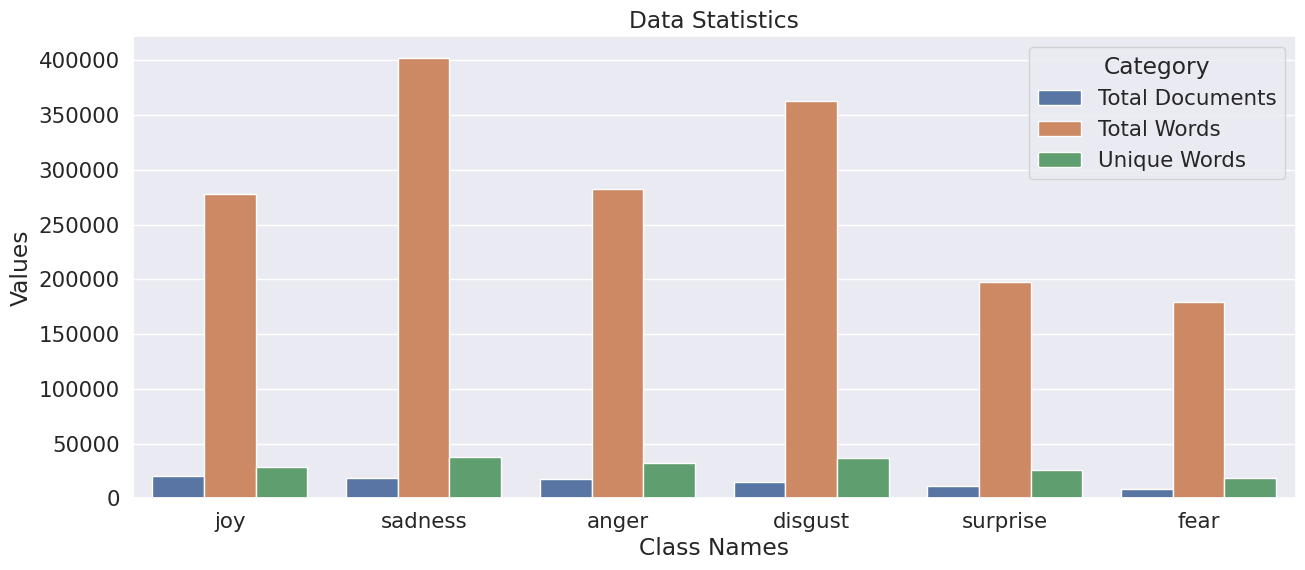

In [25]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(15, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=0);

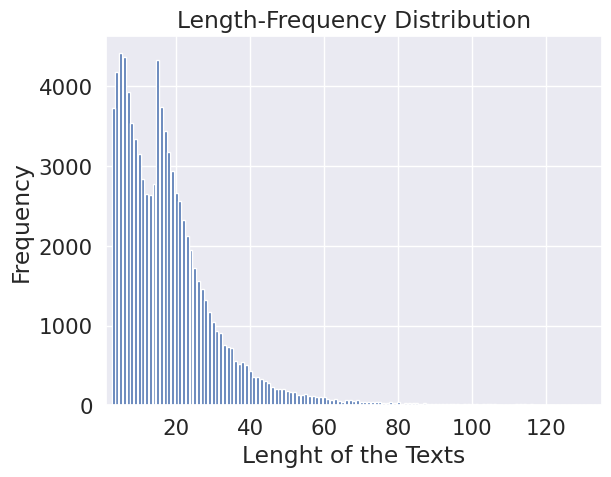

Maximum Length of a review: 608
Minimum Length of a review: 3
Average Length of a reviews: 19.0


In [26]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

In [27]:
fear = dataset[dataset.category == 'fear']
sadness = dataset[dataset.category == 'sadness']
anger = dataset[dataset.category == 'anger']
surprise = dataset[dataset.category == 'surprise']
disgust = dataset[dataset.category == 'disgust']
joy = dataset[dataset.category == 'joy']

dataset.category.value_counts()

category
joy         20391
sadness     18823
anger       17159
disgust     15079
surprise    11076
fear         8900
Name: count, dtype: int64

In [28]:
dataset

,text,label,sentence_count,category,content,cleaned,length,ReviewLength
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,1,fear,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,29,29
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear,1,fear,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,20,20
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear,1,fear,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড বিশ্বব্যাপী এক...,24,24
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear,1,fear,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,27,27
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear,1,fear,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,12,12
...,...,...,...,...,...,...,...,...
91423,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,joy,1,joy,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আজকের কে,10,10
91424,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,joy,1,joy,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,কি যে করেন না ম্যাজিস্ট্রেট স্যার প্রথমটুক পড়ে...,12,12
91425,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,joy,1,joy,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,13,13
91426,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,joy,2,joy,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,এগিয়ে যান আপনাদের দিকেই তাকিয়ে বাংলাদেশ,6,6


In [29]:
data = dataset.drop(columns=['content', 'ReviewLength'])

In [30]:
data.rename(columns={'cleaned': 'content'}, inplace=True)
data

,text,label,sentence_count,category,content,length
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,1,fear,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,29
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear,1,fear,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,20
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear,1,fear,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড বিশ্বব্যাপী এক...,24
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear,1,fear,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,27
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear,1,fear,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,12
...,...,...,...,...,...,...
91423,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,joy,1,joy,বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আজকের কে,10
91424,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,joy,1,joy,কি যে করেন না ম্যাজিস্ট্রেট স্যার প্রথমটুক পড়ে...,12
91425,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,joy,1,joy,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,13
91426,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,joy,2,joy,এগিয়ে যান আপনাদের দিকেই তাকিয়ে বাংলাদেশ,6


In [31]:
data = data[['content', 'label']]


In [32]:
data

,content,label
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড বিশ্বব্যাপী এক...,fear
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear
...,...,...
91423,বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আজকের কে,joy
91424,কি যে করেন না ম্যাজিস্ট্রেট স্যার প্রথমটুক পড়ে...,joy
91425,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,joy
91426,এগিয়ে যান আপনাদের দিকেই তাকিয়ে বাংলাদেশ,joy


In [33]:
data['content'][1463]

'চুপ করে থাক ব্যাটা\nখুবই খারাপ তোরা'

In [34]:

# Extract the texts and labels
texts = data['content'].values
labels = data['label'].values

In [35]:
def preprocess_text(text):
    # Convert the input to a string (if it's not already) and handle NaN values
    if isinstance(text, float):
        return ""  # Return an empty string for NaN values or floats
    # Convert to lowercase, remove punctuation, etc.
    text = re.sub(r'[^\w\s\u0980-\u09FF]', '', text)
    return word_tokenize(text)

# # Apply preprocessing
# texts = [preprocess_text(text) for text in texts]

In [36]:
import nltk
nltk.download('punkt_tab')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


reviews_lines1=list()
lines= data['content'].values.tolist()

for line in lines:
  tokens=word_tokenize(line)

  reviews_lines1.append(tokens)

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [37]:
reviews_lines1

[['এখানে',
  'কাওকে',
  'কবর',
  'দিয়ো',
  'না',
  'তাহলে',
  'তোমাদের',
  'পরিবারের',
  'আর',
  'কেউ',
  'বেঁচে',
  'থাকবে',
  'না',
  'ও',
  'তোমাদের',
  'কাউকে',
  'বাঁচতে',
  'দিবে',
  'না',
  'চলে',
  'যাও',
  'এখান',
  'থেকে',
  'নিজে',
  'থেকে',
  'অভিশাপকে',
  'আহ্বান',
  'করো',
  'না'],
 ['কিন্ত',
  'ভয়',
  'কিসের',
  'থেকে',
  'আমি',
  'জানতামনা',
  'কিন্ত',
  'আমার',
  'মনে',
  'হয়',
  'এটা',
  'তার',
  'নানুর',
  'কুকুরের',
  'জন্য',
  'সেটা',
  'অনেক',
  'খারাপ',
  'কুকুর',
  'ছিল'],
 ['করোনাভাইরাস',
  'থেকে',
  'সৃষ্ট',
  'রোগ',
  'কভিড',
  'বিশ্বব্যাপী',
  'একটি',
  'মহামারী',
  'হিসেবে',
  'হাজির',
  'হয়েছে',
  'বাংলাদেশ',
  'ঘনবসতিপূর্ণ',
  'দেশ',
  'হওয়ার',
  'কারণে',
  'আমাদের',
  'স্বাস্থ্য',
  'ঝুঁকি',
  'অন্য',
  'অনেক',
  'দেশের',
  'চেয়ে',
  'বেশি'],
 ['চিতাও',
  'তার',
  'দিকে',
  'এগোতে',
  'সাহস',
  'পাচ্ছে',
  'না',
  'দুদিনের',
  'অনাহারী',
  'চিতা',
  'কুকুরদের',
  'দেখে',
  'ক্ষুধার',
  'কথা',
  'ভুলে',
  'লেজ',
  'গুটিয়ে',
  'বনের',
  'দিকে',
  'ছুটে',
 

In [38]:
len(reviews_lines1)

91428

In [39]:
# import gensim
# EMBEDDING_DIM=100
# model=gensim.models.Word2Vec(sentences=reviews_lines1,\
#                              vector_size=EMBEDDING_DIM, window=5,min_count=2)


In [40]:
# import gensim

# # Define embedding dimension
# EMBEDDING_DIM = 200

# from gensim.models import Word2Vec
# model = Word2Vec(reviews_lines1, vector_size=200, window=3, min_count=2, workers=4, sg=0)





In [41]:
import gensim

# Define embedding dimension
EMBEDDING_DIM = 200

from gensim.models import FastText

# Assuming reviews_lines1 is your preprocessed text data (list of tokenized sentences)
model = FastText(sentences=reviews_lines1, vector_size=EMBEDDING_DIM, window=5, min_count=5, workers=4, sg=0)



In [42]:
words = list(model.wv.index_to_key)


In [43]:
len(words)

21211

In [44]:
model.wv.most_similar("সন্ত্রাস")

[('সন্ত্রাসী', 0.9886510968208313),
 ('সন্ত্রাসীর', 0.9772899150848389),
 ('সন্ত্রাসি', 0.9687352776527405),
 ('সন্ত্রাসীরা', 0.9494985342025757),
 ('তন্ত্র', 0.944701611995697),
 ('ষড়যন্ত্র', 0.9414063692092896),
 ('সন্ত্রস্ত', 0.9333755373954773),
 ('রাজতন্ত্র', 0.9324198961257935),
 ('ষড়যন্ত্র', 0.9305208921432495),
 ('স্বতন্ত্র', 0.9292706251144409)]

In [45]:
similarity_score = model.wv.similarity("সন্ত্রাস", "ছাত্র")
print(similarity_score)


0.7938026


In [46]:
filename = '/kaggle/working/FastText_SkipGram.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [47]:
import os
embedding_index={}

f = open('/kaggle/working/FastText_SkipGram.txt',encoding='utf-8')
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:])
  embedding_index[word]=coefs

f.close()

In [48]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Initialize the label encoder
label_encoder = LabelEncoder()

# Convert string labels (e.g., 'A', 'B', etc.) to integers
encoded_labels = label_encoder.fit_transform(labels)

# Now convert the integer labels to one-hot encoding
y = to_categorical(encoded_labels, num_classes=6)  # Assuming 5 classes

# Check if the labels have been correctly transformed
print(f"Encoded labels: {encoded_labels}")
print(f"One-hot encoded labels shape: {y.shape}")

Encoded labels: [2 2 2 ... 3 3 3]
One-hot encoded labels shape: (91428, 6)


In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Initialize the Tokenizer
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(reviews_lines1)

# Convert texts to sequences of integers
sequences = tokenizer_obj.texts_to_sequences(reviews_lines1)

# Define maximum length for padding
max_length = 600

word_index=tokenizer_obj.word_index

# Pad sequences to ensure uniform input size
review_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare sentiment labels
sentiment = y

# Print the shape of the padded sequences and sentiment labels
print("Padded reviews shape:", review_pad.shape)
print("Sentiment shape:", sentiment.shape)

# Shuffle the dataset
indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)

# Apply the shuffle to the data
review_pad = review_pad[indices]
sentiment = sentiment[indices]

# Now review_pad and sentiment can be used directly for training
X_train_pad = review_pad
y_train = sentiment

print("Training reviews shape:", X_train_pad.shape)
print("Training sentiment shape:", y_train.shape)


Padded reviews shape: (91428, 600)
Sentiment shape: (91428, 6)
Training reviews shape: (91428, 600)
Training sentiment shape: (91428, 6)


In [50]:
# TEST_SPLIT=0.20
# num_test_samples = int(TEST_SPLIT*X_train_pad.shape[0])



# X_train_pad=X_train_pad[num_test_samples:]
# y_train= y_train[num_test_samples:]

# x_test_pad= X_train_pad[:num_test_samples]
# y_test= y_train[:num_test_samples]


In [51]:
# Step 2: Perform a stratified split for train, validation, and test sets
# First, split into train+val and test (80% train+val, 20% test)
X_train_pad, X_test_pad, y_train, y_test = train_test_split(
    review_pad, sentiment, test_size=0.20, stratify=sentiment, random_state=42
)

# Then split train+val into train and validation (75% train, 25% validation)
X_train_pad, X_val_pad, y_train, y_val = train_test_split(
    X_train_pad, y_train, test_size=0.25, stratify=y_train, random_state=42
)

# Output the shapes of the data to check the splits
print("Train data shape:", X_train_pad.shape, y_train.shape)
print("Validation data shape:", X_val_pad.shape, y_val.shape)
print("Test data shape:", X_test_pad.shape, y_test.shape)

Train data shape: (54856, 600) (54856, 6)
Validation data shape: (18286, 600) (18286, 6)
Test data shape: (18286, 600) (18286, 6)


In [52]:
print(X_train_pad.shape)
print(y_train.shape)
print(X_val_pad.shape)
print(y_val.shape)
print(X_test_pad.shape)
print(y_test.shape)

(54856, 600)
(54856, 6)
(18286, 600)
(18286, 6)
(18286, 600)
(18286, 6)


In [53]:
y_test

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [54]:
EMBEDDING_DIM=200
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,EMBEDDING_DIM))

for word, i in word_index.items():
  if i>num_words:
    continue
  embedding_vector=embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [55]:
num_words

102205

In [56]:
EMBEDDING_DIM

200

In [57]:
max_length

600

In [58]:
X_train_pad[5]

array([ 1566,  1566,   311,    11, 21841,   102,  5470,  1788,   410,
        1581,    49,  5607,  1258,    50,    96,  2931,   186,  5095,
        2428,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [59]:
embedding_matrix

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-6.2377730e-01,  6.4904380e-01, -1.5957683e+00, ...,
        -2.8940592e+00, -1.0497879e+00,  1.4778466e+00],
       [ 6.1240274e-01, -1.5970692e-03, -2.0383697e-02, ...,
        -1.5652146e+00,  6.2971660e-01,  8.0485830e-01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]])

# **CNN**

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.utils import plot_model


num_classes = 6         # Number of classes for classification
filters = 128           # Number of filters in the Conv1D layer
kernel_sizes = [3, 4, 5]  # Kernel sizes for Conv1D

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Add embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)  # Apply the input tensor here

# Convolutional and Max-Pooling layers
conv_pools = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu')(embedding_layer)
    pool = MaxPooling1D(pool_size=max_length - kernel_size + 1)(conv)
    conv_pools.append(pool)

# Concatenate pooled features
concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

# Flatten and add fully connected layers
flat = Flatten()(concat)
dense = Dense(128, activation='relu')(flat)
output = Dense(num_classes, activation='softmax')(dense)

# Create and compile the model
model = Model(inputs=input, outputs=output)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Build the model with the input shape
model.build(input_shape=(None, max_length))

# # Optionally, visualize the model architecture
# plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 600)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 600, 200)       │     20,441,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 598, 128)       │         76,928 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 597, 128)       │        102,528 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 596, 128)       │        128,128 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 1, 128)         │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 1, 128)         │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 1, 128)         │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 1, 384)         │              0 │ max_pooling1d[0][0],   │
│                           │                        │                │ max_pooling1d_1[0][0], │
│                           │                        │                │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 384)            │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         49,280 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 6)              │            774 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 20,798,638 (79.34 MB)

 Trainable params: 357,638 (1.36 MB)

 Non-trainable params: 20,441,000 (77.98 MB)

In [61]:
import time
from sklearn.model_selection import cross_validate
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs without improvement
    restore_best_weights=True,  # Restore best model weights
    verbose=1
)

start_time = time.time()

# Train the model with Early Stopping
history_cnn = model.fit(
    X_train_pad, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping],  # Add Early Stopping
    verbose=2
)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Epoch 1/50
858/858 - 29s - 34ms/step - accuracy: 0.4466 - loss: 1.3969 - val_accuracy: 0.4716 - val_loss: 1.3247
Epoch 2/50
858/858 - 21s - 24ms/step - accuracy: 0.5070 - loss: 1.2502 - val_accuracy: 0.4951 - val_loss: 1.2780
Epoch 3/50
858/858 - 21s - 25ms/step - accuracy: 0.5368 - loss: 1.1796 - val_accuracy: 0.4928 - val_loss: 1.3125
Epoch 4/50
858/858 - 22s - 25ms/step - accuracy: 0.5638 - loss: 1.1137 - val_accuracy: 0.5155 - val_loss: 1.2440
Epoch 5/50
858/858 - 22s - 26ms/step - accuracy: 0.5905 - loss: 1.0547 - val_accuracy: 0.5174 - val_loss: 1.2620
Epoch 6/50
858/858 - 22s - 26ms/step - accuracy: 0.6178 - loss: 0.9906 - val_accuracy: 0.5306 - val_loss: 1.2489
Epoch 7/50
858/858 - 22s - 26ms/step - accuracy: 0.6431 - loss: 0.9276 - val_accuracy: 0.5364 - val_loss: 1.2870
Epoch 8/50
858/858 - 22s - 26ms/step - accuracy: 0.6678 - loss: 0.8686 - val_accuracy: 0.5296 - val_loss: 1.2852
Epoch 9/50
858/858 - 22s - 26ms/step - accuracy: 0.6883 - loss: 0.8153 - val_accuracy: 0.5324 - 

In [62]:
start_time = time.time()

score,acc=model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5178 - loss: 1.2403
Elapsed time: 4.138434648513794 seconds
Test Score: 1.234372615814209
Accuracy: 0.5216012001037598


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


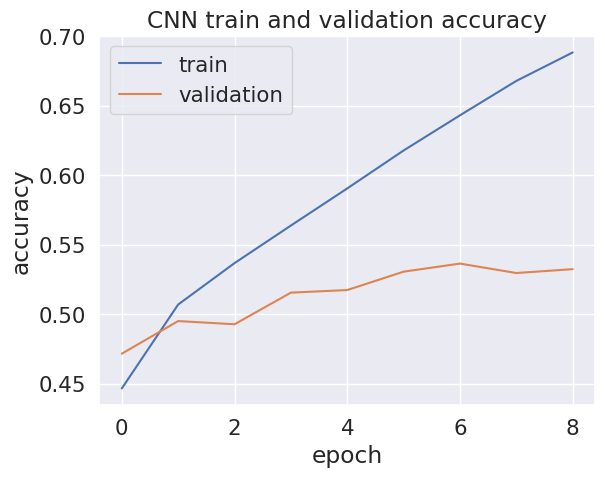

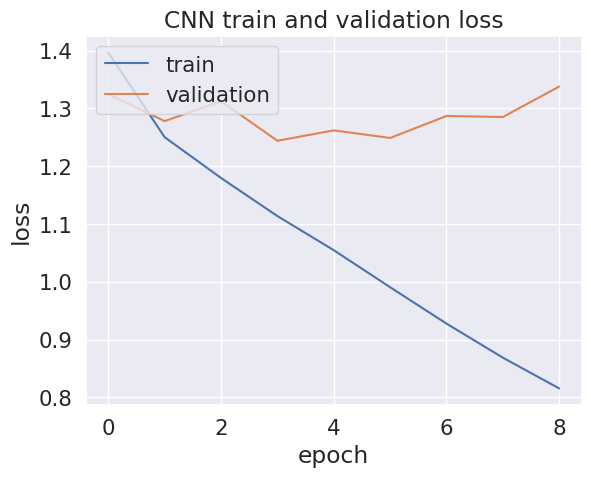

In [63]:
print(history_cnn.history.keys())
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [64]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['joy', 'anger', 'surprise', 'disguist', 'fear', 'sadness']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



572/572 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

         joy     0.4156    0.3907    0.4028      3432
       anger     0.4304    0.5574    0.4857      3016
    surprise     0.7631    0.4180    0.5401      1780
    disguist     0.6987    0.6824    0.6905      4078
        fear     0.4507    0.5256    0.4853      3765
     sadness     0.5599    0.4560    0.5026      2215

    accuracy                         0.5216     18286
   macro avg     0.5530    0.5050    0.5178     18286
weighted avg     0.5397    0.5216    0.5231     18286



572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


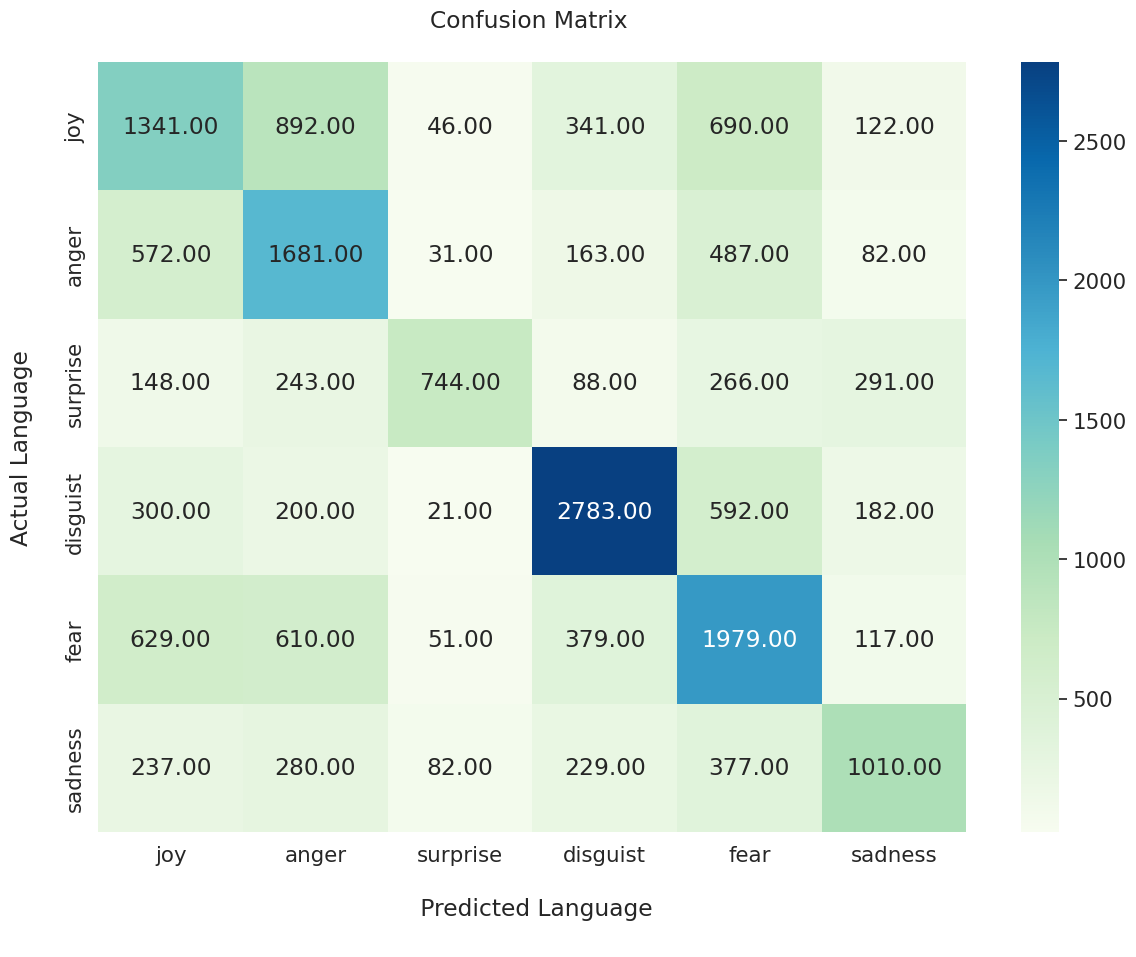

In [65]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['joy', 'anger', 'surprise', 'disguist', 'fear', 'sadness'])
fx.yaxis.set_ticklabels(['joy', 'anger', 'surprise', 'disguist', 'fear', 'sadness'])
plt.show()

# Show the plot
plt.show()

# **LSTM**

In [66]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant

# Define parameters
num_classes = 6
lstm_units = 128

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)

# Bidirectional LSTM layer
lstm = Bidirectional(LSTM(lstm_units, return_sequences=False))(embedding_layer)

# Fully connected layer
dense = Dense(128, activation='relu')(lstm)

# Output layer
output = Dense(num_classes, activation='softmax')(dense)

# Create and compile the model
L_model = Model(inputs=input, outputs=output)
L_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
L_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 600)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 600, 200)            │      20,441,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         336,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,811,566 (79.39 MB)

 Trainable params: 370,566 (1.41 MB)

 Non-trainable params: 20,441,000 (77.98 MB)

In [67]:
import time
from sklearn.model_selection import cross_validate
from tensorflow.keras.callbacks import EarlyStopping


start_time = time.time()

# Train the model with Early Stopping
history_lstm = L_model.fit(
    X_train_pad, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping],  # Add Early Stopping
    verbose=2
)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Epoch 1/50
858/858 - 57s - 67ms/step - accuracy: 0.4803 - loss: 1.3054 - val_accuracy: 0.4962 - val_loss: 1.2635
Epoch 2/50
858/858 - 52s - 61ms/step - accuracy: 0.5327 - loss: 1.1838 - val_accuracy: 0.5312 - val_loss: 1.1875
Epoch 3/50
858/858 - 52s - 61ms/step - accuracy: 0.5650 - loss: 1.1104 - val_accuracy: 0.5456 - val_loss: 1.1678
Epoch 4/50
858/858 - 52s - 61ms/step - accuracy: 0.5964 - loss: 1.0408 - val_accuracy: 0.5473 - val_loss: 1.1710
Epoch 5/50
858/858 - 52s - 61ms/step - accuracy: 0.6246 - loss: 0.9711 - val_accuracy: 0.5575 - val_loss: 1.1615
Epoch 6/50
858/858 - 52s - 61ms/step - accuracy: 0.6563 - loss: 0.9001 - val_accuracy: 0.5536 - val_loss: 1.1875
Epoch 7/50
858/858 - 52s - 61ms/step - accuracy: 0.6847 - loss: 0.8308 - val_accuracy: 0.5669 - val_loss: 1.1874
Epoch 8/50
858/858 - 52s - 61ms/step - accuracy: 0.7140 - loss: 0.7623 - val_accuracy: 0.5633 - val_loss: 1.2284
Epoch 9/50
858/858 - 52s - 61ms/step - accuracy: 0.7416 - loss: 0.6930 - val_accuracy: 0.5744 - 

In [68]:
start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5507 - loss: 1.1589
Elapsed time: 4.820651054382324 seconds
Test Score: 1.1576080322265625
Accuracy: 0.5531554222106934


In [69]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['joy', 'anger', 'surprise', 'disguist', 'fear', 'sadness']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

         joy     0.4156    0.3907    0.4028      3432
       anger     0.4304    0.5574    0.4857      3016
    surprise     0.7631    0.4180    0.5401      1780
    disguist     0.6987    0.6824    0.6905      4078
        fear     0.4507    0.5256    0.4853      3765
     sadness     0.5599    0.4560    0.5026      2215

    accuracy                         0.5216     18286
   macro avg     0.5530    0.5050    0.5178     18286
weighted avg     0.5397    0.5216    0.5231     18286



# **Bi-LSTM**

In [70]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant

# Define parameters
num_classes = 6
lstm_units = 128  # Number of LSTM units

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)

# Bidirectional LSTM layer
bi_lstm = Bidirectional(LSTM(lstm_units, return_sequences=True))(embedding_layer)

# Flatten and fully connected layers
flat = Flatten()(bi_lstm)
dense = Dense(128, activation='relu')(flat)

# Output layer
output = Dense(num_classes, activation='softmax')(dense)

# Create and compile the model
Bi_model = Model(inputs=input, outputs=output)
Bi_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
Bi_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 600)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 600, 200)            │      20,441,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 600, 256)            │         336,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 153600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      19,660,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,439,598 (154.26 MB)

 Trainable params: 19,998,598 (76.29 MB)

 Non-trainable params: 20,441,000 (77.98 MB)

In [71]:
import time
from sklearn.model_selection import cross_validate
from tensorflow.keras.callbacks import EarlyStopping


start_time = time.time()

# Train the model with Early Stopping
history_lstm = Bi_model.fit(
    X_train_pad, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping],  # Add Early Stopping
    verbose=2
)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

Epoch 1/50
858/858 - 70s - 82ms/step - accuracy: 0.4936 - loss: 1.2840 - val_accuracy: 0.5199 - val_loss: 1.2177
Epoch 2/50
858/858 - 68s - 79ms/step - accuracy: 0.5693 - loss: 1.0959 - val_accuracy: 0.5589 - val_loss: 1.1484
Epoch 3/50
858/858 - 68s - 79ms/step - accuracy: 0.6549 - loss: 0.8968 - val_accuracy: 0.5711 - val_loss: 1.1855
Epoch 4/50
858/858 - 68s - 79ms/step - accuracy: 0.7479 - loss: 0.6772 - val_accuracy: 0.5879 - val_loss: 1.2496
Epoch 5/50
858/858 - 68s - 79ms/step - accuracy: 0.8380 - loss: 0.4634 - val_accuracy: 0.5937 - val_loss: 1.4544
Epoch 6/50
858/858 - 68s - 79ms/step - accuracy: 0.8991 - loss: 0.2929 - val_accuracy: 0.5966 - val_loss: 1.6108
Epoch 7/50
858/858 - 68s - 79ms/step - accuracy: 0.9363 - loss: 0.2064 - val_accuracy: 0.6013 - val_loss: 1.8330
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.
Elapsed time: 476.64 seconds


In [72]:
start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5507 - loss: 1.1589
Elapsed time: 4.804004430770874 seconds
Test Score: 1.1576080322265625
Accuracy: 0.5531554222106934


In [73]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['joy', 'anger', 'surprise', 'disguist', 'fear', 'sadness']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

         joy     0.4156    0.3907    0.4028      3432
       anger     0.4304    0.5574    0.4857      3016
    surprise     0.7631    0.4180    0.5401      1780
    disguist     0.6987    0.6824    0.6905      4078
        fear     0.4507    0.5256    0.4853      3765
     sadness     0.5599    0.4560    0.5026      2215

    accuracy                         0.5216     18286
   macro avg     0.5530    0.5050    0.5178     18286
weighted avg     0.5397    0.5216    0.5231     18286



# **Bi-GRU**

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, GRU, Bidirectional, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant

# Define parameters
num_classes = 6
gru_units = 128  # Number of GRU units

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)

# Bidirectional GRU layer
bi_gru = Bidirectional(GRU(gru_units, return_sequences=True))(embedding_layer)

# Flatten and fully connected layers
flat = Flatten()(bi_gru)
dense = Dense(128, activation='relu')(flat)

# Output layer
output = Dense(num_classes, activation='softmax')(dense)

# Create and compile the model
gru_model = Model(inputs=input, outputs=output)
gru_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
gru_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 600)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 600, 200)            │      20,441,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 600, 256)            │         253,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 153600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      19,660,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,356,142 (153.95 MB)

 Trainable params: 19,915,142 (75.97 MB)

 Non-trainable params: 20,441,000 (77.98 MB)

In [75]:
import time
from sklearn.model_selection import cross_validate
from tensorflow.keras.callbacks import EarlyStopping


start_time = time.time()

# Train the model with Early Stopping
history_lstm = gru_model.fit(
    X_train_pad, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping],  # Add Early Stopping
    verbose=2
)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

Epoch 1/50
858/858 - 65s - 75ms/step - accuracy: 0.4836 - loss: 1.3107 - val_accuracy: 0.5209 - val_loss: 1.2245
Epoch 2/50
858/858 - 62s - 72ms/step - accuracy: 0.5550 - loss: 1.1263 - val_accuracy: 0.5397 - val_loss: 1.1721
Epoch 3/50
858/858 - 62s - 72ms/step - accuracy: 0.6237 - loss: 0.9617 - val_accuracy: 0.5578 - val_loss: 1.1848
Epoch 4/50
858/858 - 62s - 72ms/step - accuracy: 0.7049 - loss: 0.7733 - val_accuracy: 0.5702 - val_loss: 1.2528
Epoch 5/50
858/858 - 62s - 72ms/step - accuracy: 0.7787 - loss: 0.5863 - val_accuracy: 0.5794 - val_loss: 1.3379
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
Elapsed time: 313.40 seconds


In [76]:
start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5507 - loss: 1.1589
Elapsed time: 4.8161842823028564 seconds
Test Score: 1.1576080322265625
Accuracy: 0.5531554222106934


In [77]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['joy', 'anger', 'surprise', 'disguist', 'fear', 'sadness']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

         joy     0.4156    0.3907    0.4028      3432
       anger     0.4304    0.5574    0.4857      3016
    surprise     0.7631    0.4180    0.5401      1780
    disguist     0.6987    0.6824    0.6905      4078
        fear     0.4507    0.5256    0.4853      3765
     sadness     0.5599    0.4560    0.5026      2215

    accuracy                         0.5216     18286
   macro avg     0.5530    0.5050    0.5178     18286
weighted avg     0.5397    0.5216    0.5231     18286



# **CNN+LSTM**

In [78]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant

# Define parameters
num_classes = 6
filters = 128
kernel_sizes = [3, 4, 5]
lstm_units = 128

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)

# Convolutional and Max-Pooling layers
conv_pools = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu',
                  padding='same')(embedding_layer)
    pool = MaxPooling1D(pool_size=2)(conv)
    conv_pools.append(pool)

# Concatenate pooled features
concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

# LSTM layer after CNN
lstm = LSTM(lstm_units, return_sequences=False)(concat)

# Fully connected layer
dense = Dense(128, activation='relu')(lstm)

# Output layer
output = Dense(num_classes, activation='softmax')(dense)

# Create and compile the model
cnn_lstm_model = Model(inputs=input, outputs=output)
cnn_lstm_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
cnn_lstm_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 600)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 600, 200)       │     20,441,000 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 600, 128)       │         76,928 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 600, 128)       │        102,528 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 600, 128)       │        128,128 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 300, 128)       │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 300, 128)       │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, 300, 128)       │              0 │ conv1d_5[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 300, 384)       │              0 │ max_pooling1d_3[0][0], │
│ (Concatenate)             │                        │                │ max_pooling1d_4[0][0], │
│                           │                        │                │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 128)            │        262,656 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 128)            │         16,512 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 6)              │            774 │ dense_8[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 21,028,526 (80.22 MB)

 Trainable params: 587,526 (2.24 MB)

 Non-trainable params: 20,441,000 (77.98 MB)

In [79]:
import time
from sklearn.model_selection import cross_validate
from tensorflow.keras.callbacks import EarlyStopping


start_time = time.time()

# Train the model with Early Stopping
history_lstm = cnn_lstm_model.fit(
    X_train_pad, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping],  # Add Early Stopping
    verbose=2
)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

Epoch 1/50
858/858 - 43s - 50ms/step - accuracy: 0.2214 - loss: 1.7556 - val_accuracy: 0.2231 - val_loss: 1.7541
Epoch 2/50
858/858 - 39s - 45ms/step - accuracy: 0.2226 - loss: 1.7544 - val_accuracy: 0.2231 - val_loss: 1.7538
Epoch 3/50
858/858 - 38s - 45ms/step - accuracy: 0.2223 - loss: 1.7543 - val_accuracy: 0.2231 - val_loss: 1.7539
Epoch 4/50
858/858 - 38s - 45ms/step - accuracy: 0.2231 - loss: 1.7543 - val_accuracy: 0.2231 - val_loss: 1.7540
Epoch 5/50
858/858 - 38s - 45ms/step - accuracy: 0.2231 - loss: 1.7543 - val_accuracy: 0.2231 - val_loss: 1.7538
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
Elapsed time: 196.27 seconds


In [80]:
start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5507 - loss: 1.1589
Elapsed time: 4.804332733154297 seconds
Test Score: 1.1576080322265625
Accuracy: 0.5531554222106934


In [81]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['joy', 'anger', 'surprise', 'disguist', 'fear', 'sadness']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

         joy     0.4156    0.3907    0.4028      3432
       anger     0.4304    0.5574    0.4857      3016
    surprise     0.7631    0.4180    0.5401      1780
    disguist     0.6987    0.6824    0.6905      4078
        fear     0.4507    0.5256    0.4853      3765
     sadness     0.5599    0.4560    0.5026      2215

    accuracy                         0.5216     18286
   macro avg     0.5530    0.5050    0.5178     18286
weighted avg     0.5397    0.5216    0.5231     18286



# **CNN + Bi-LSTM**

In [82]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Bidirectional, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant

# Define parameters
num_classes = 6
filters = 256
kernel_sizes = [3, 4, 5]
lstm_units = 128

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)

# Convolutional and Max-Pooling layers
conv_pools = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu',
                  padding='same')(embedding_layer)
    pool = MaxPooling1D(pool_size=2)(conv)
    conv_pools.append(pool)

# Concatenate pooled features
concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

# Bidirectional LSTM layer after CNN
bi_lstm = Bidirectional(LSTM(lstm_units, return_sequences=False))(concat)

# Fully connected layer
dense = Dense(128, activation='relu')(bi_lstm)

# Output layer
output = Dense(num_classes, activation='softmax')(dense)

# Create and compile the model
cnn_bi_lstm_model = Model(inputs=input, outputs=output)
cnn_bi_lstm_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
cnn_bi_lstm_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 600)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 600, 200)       │     20,441,000 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 600, 256)       │        153,856 │ embedding_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 600, 256)       │        205,056 │ embedding_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 600, 256)       │        256,256 │ embedding_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_6           │ (None, 300, 256)       │              0 │ conv1d_6[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_7           │ (None, 300, 256)       │              0 │ conv1d_7[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_8           │ (None, 300, 256)       │              0 │ conv1d_8[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 300, 768)       │              0 │ max_pooling1d_6[0][0], │
│ (Concatenate)             │                        │                │ max_pooling1d_7[0][0], │
│                           │                        │                │ max_pooling1d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3           │ (None, 256)            │        918,528 │ concatenate_2[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 128)            │         32,896 │ bidirectional_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 6)              │            774 │ dense_10[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 22,008,366 (83.96 MB)

 Trainable params: 1,567,366 (5.98 MB)

 Non-trainable params: 20,441,000 (77.98 MB)

In [83]:
import time
from sklearn.model_selection import cross_validate
from tensorflow.keras.callbacks import EarlyStopping


start_time = time.time()

# Train the model with Early Stopping
history_lstm = cnn_bi_lstm_model.fit(
    X_train_pad, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping],  # Add Early Stopping
    verbose=2
)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

Epoch 1/50
858/858 - 90s - 104ms/step - accuracy: 0.4627 - loss: 1.3519 - val_accuracy: 0.4960 - val_loss: 1.2881
Epoch 2/50
858/858 - 85s - 99ms/step - accuracy: 0.5091 - loss: 1.2448 - val_accuracy: 0.5172 - val_loss: 1.2373
Epoch 3/50
858/858 - 85s - 99ms/step - accuracy: 0.5425 - loss: 1.1718 - val_accuracy: 0.5237 - val_loss: 1.2267
Epoch 4/50
858/858 - 84s - 98ms/step - accuracy: 0.5699 - loss: 1.1055 - val_accuracy: 0.5336 - val_loss: 1.1964
Epoch 5/50
858/858 - 85s - 99ms/step - accuracy: 0.6029 - loss: 1.0281 - val_accuracy: 0.5358 - val_loss: 1.2059
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
Elapsed time: 428.87 seconds


In [84]:
start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5507 - loss: 1.1589
Elapsed time: 4.816293239593506 seconds
Test Score: 1.1576080322265625
Accuracy: 0.5531554222106934


In [85]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['joy', 'anger', 'surprise', 'disguist', 'fear', 'sadness']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

         joy     0.4156    0.3907    0.4028      3432
       anger     0.4304    0.5574    0.4857      3016
    surprise     0.7631    0.4180    0.5401      1780
    disguist     0.6987    0.6824    0.6905      4078
        fear     0.4507    0.5256    0.4853      3765
     sadness     0.5599    0.4560    0.5026      2215

    accuracy                         0.5216     18286
   macro avg     0.5530    0.5050    0.5178     18286
weighted avg     0.5397    0.5216    0.5231     18286



# **CNN+Bi-LSTM hyperperameter tunning**

In [86]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [87]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant

def build_model(hp):
    input = Input(shape=(max_length,), dtype='int32')

    # Embedding Layer
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=EMBEDDING_DIM,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input)

    # CNN Layers with Tunable Filters and Kernel Sizes
    conv_pools = []
    kernel_sizes = hp.Choice('kernel_size', values=[3, 4, 5])  # Tune kernel sizes
    filters = hp.Choice('filters', values=[64, 128, 256])  # Tune filter size
    
    for kernel_size in [kernel_sizes]:
        conv = Conv1D(filters=filters,
                      kernel_size=kernel_size,
                      activation='relu',
                      padding='same')(embedding_layer)
        pool = MaxPooling1D(pool_size=2)(conv)
        conv_pools.append(pool)

    # Concatenate CNN outputs
    concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

    # Bi-LSTM Layer
    lstm_units = hp.Choice('lstm_units', values=[64, 128, 256])  # Tune LSTM units
    bi_lstm = Bidirectional(LSTM(lstm_units, return_sequences=False))(concat)

    # Fully Connected Layers
    dropout_rate = hp.Choice('dropout', values=[0.3, 0.5])  # Tune dropout rate
    dense = Dense(128, activation='relu')(bi_lstm)
    dropout = Dropout(dropout_rate)(dense)

    # Output Layer
    output = Dense(num_classes, activation='softmax')(dropout)

    # Compile Model
    hype_cnn_bi_lstm_model = Model(inputs=input, outputs=output)
    hype_cnn_bi_lstm_model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.001, 0.0005])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [88]:
from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Try 10 different parameter combinations
    executions_per_trial=1,  # Number of times to run each combination
    directory='tuner_results',
    project_name='cnn_bilstm_tuning'
)

# Run hyperparameter search
tuner.search(X_train_pad, y_train, epochs=10, validation_data=(X_val_pad, y_val), batch_size=64)

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: Filters: {best_hps.get('filters')}, Kernel Size: {best_hps.get('kernel_size')}, "
      f"LSTM Units: {best_hps.get('lstm_units')}, Dropout: {best_hps.get('dropout')}, "
      f"Learning Rate: {best_hps.get('learning_rate')}")


Trial 10 Complete [00h 03m 49s]
val_accuracy: 0.5736629366874695

Best val_accuracy So Far: 0.5736629366874695
Total elapsed time: 00h 38m 15s
Best Hyperparameters: Filters: 64, Kernel Size: 5, LSTM Units: 128, Dropout: 0.5, Learning Rate: 0.001


In [89]:
# best_model = tuner.hypermodel.build(best_hps)
# history = best_model.fit(X_train_pad, y_train, epochs=20, validation_data=(X_val_pad, y_val), batch_size=64)
# print('Test Score:',score)
# print('Accuracy:',acc)

# **CNN+LSTM hyperperameter**

In [90]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding, LSTM, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant

def build_model(hp):
    input = Input(shape=(max_length,), dtype='int32')

    # Embedding Layer
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=EMBEDDING_DIM,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input)

    # CNN Layers with Tunable Filters and Kernel Sizes
    conv_pools = []
    kernel_sizes = hp.Choice('kernel_size', values=[3, 4, 5])  # Tune kernel sizes
    filters = hp.Choice('filters', values=[64, 128, 256])  # Tune filter size
    
    for kernel_size in [kernel_sizes]:
        conv = Conv1D(filters=filters,
                      kernel_size=kernel_size,
                      activation='relu',
                      padding='same')(embedding_layer)
        pool = MaxPooling1D(pool_size=2)(conv)
        conv_pools.append(pool)

    # Concatenate CNN outputs
    concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

    # LSTM Layer
    lstm_units = hp.Choice('lstm_units', values=[64, 128, 256])  # Tune LSTM units
    lstm = LSTM(lstm_units, return_sequences=False)(concat)

    # Fully Connected Layer
    dropout_rate = hp.Choice('dropout', values=[0.3, 0.5])  # Tune dropout rate
    dense = Dense(128, activation='relu')(lstm)
    dropout = Dropout(dropout_rate)(dense)

    # Output Layer
    output = Dense(num_classes, activation='softmax')(dropout)

    # Compile Model
    cnn_lstm_model = Model(inputs=input, outputs=output)
    cnn_lstm_model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.001, 0.0005])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [91]:
from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Try 10 different parameter combinations
    executions_per_trial=1,  # Number of times to run each combination
    directory='tuner_results',
    project_name='cnn_lstm_tuning'
)

# Run hyperparameter search
tuner.search(X_train_pad, y_train, epochs=10, validation_data=(X_val_pad, y_val), batch_size=64)

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: Filters: {best_hps.get('filters')}, Kernel Size: {best_hps.get('kernel_size')}, "
      f"LSTM Units: {best_hps.get('lstm_units')}, Dropout: {best_hps.get('dropout')}, "
      f"Learning Rate: {best_hps.get('learning_rate')}")


Trial 10 Complete [00h 03m 49s]
val_accuracy: 0.5734441876411438

Best val_accuracy So Far: 0.5791316032409668
Total elapsed time: 00h 38m 07s
Best Hyperparameters: Filters: 256, Kernel Size: 5, LSTM Units: 128, Dropout: 0.3, Learning Rate: 0.001


572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


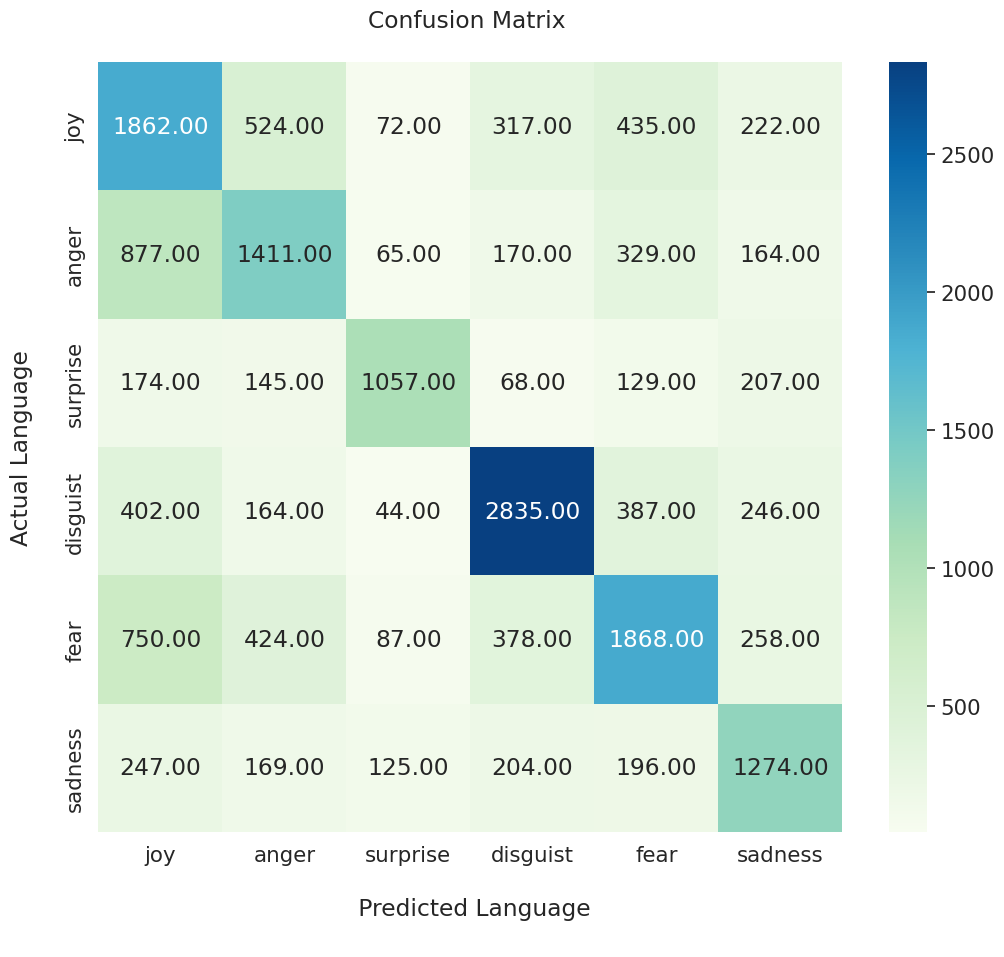

In [92]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(12,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['joy', 'anger', 'surprise', 'disguist', 'fear', 'sadness'])
fx.yaxis.set_ticklabels(['joy', 'anger', 'surprise', 'disguist', 'fear', 'sadness'])
plt.show()

# Show the plot
plt.show()

572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


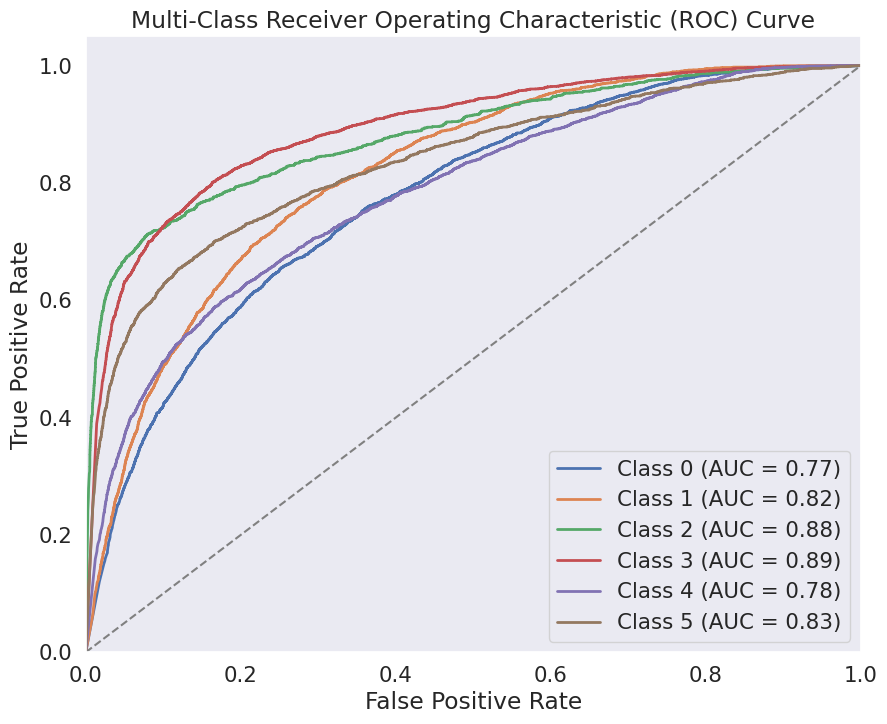

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get predicted probabilities from your deep learning model
y_pred_probs = model.predict(X_test_pad)  # Predicted probabilities for each class

# Get true labels for the test set
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels to categorical labels

# Binarize the output labels for One-vs-Rest (OvR) ROC curve
n_classes = y_test.shape[1]
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Compute ROC curve and AUC for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
# Save the figure as a PDF
plt.savefig("roc curve.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.show()
